In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("/kaggle/input/szeged-weather/weatherHistory.csv")
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


# Exploração do banco de dados

**1. O primeiro passo é importar e visualizar o banco de dados, rastrear os valores faltantes e identificar os momentos estatísticos existentes**

In [2]:
# número de valores faltantes em cada coluna
df.isna().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [3]:
df["Precip Type"].unique()

array(['rain', 'snow', nan], dtype=object)

**Qual sua hipótese para a existência desses valores faltantes?**

Teve chuva e neve? Granizo? Algum outro tipo de precipitation?

In [4]:
# momentos estatísticos do banco de dados
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<AxesSubplot:title={'center':'Temperature (C)'}>,
        <AxesSubplot:title={'center':'Apparent Temperature (C)'}>,
        <AxesSubplot:title={'center':'Humidity'}>],
       [<AxesSubplot:title={'center':'Wind Speed (km/h)'}>,
        <AxesSubplot:title={'center':'Wind Bearing (degrees)'}>,
        <AxesSubplot:title={'center':'Visibility (km)'}>],
       [<AxesSubplot:title={'center':'Loud Cover'}>,
        <AxesSubplot:title={'center':'Pressure (millibars)'}>,
        <AxesSubplot:>]], dtype=object)

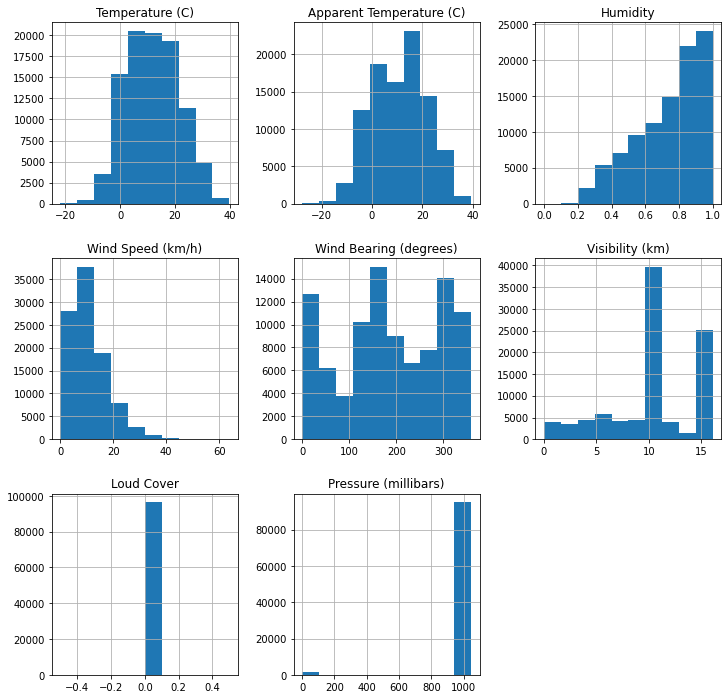

In [5]:
fig = plt.figure(figsize = (12,12))
ax = fig.gca()
df.hist(ax = ax)

**É possível identificar algo de estranho com a coluna “Pressure(millibars)”. Identifique e explique o que há de errado**

Existem valores muito próximos de zero, ou iguais a zero.

In [6]:
#quantidade de valores errados
df["Pressure (millibars)"].loc[df["Pressure (millibars)"]==0].count()

1288

In [7]:
# replace zeros by NaN
df["Pressure (millibars)"].loc[df["Pressure (millibars)"]==0] = np.nan

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


**2. Deve-se agora definir quais são as features categóricas e quais são as numéricas, para isso existe o método “.select_dtypes”, aqui será necessário identificar apenas os nomes das features**


In [8]:
categorical_cols = [cname for cname in df.columns if df[cname].dtype  == "object"]
numerical_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      95165 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [10]:
df["Precip Type"].value_counts(dropna=False)

rain    85224
snow    10712
NaN       517
Name: Precip Type, dtype: int64

In [11]:
df["Summary"].value_counts()

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [12]:
df["Daily Summary"].value_counts()

Mostly cloudy throughout the day.                                                                       20085
Partly cloudy throughout the day.                                                                        9981
Partly cloudy until night.                                                                               6169
Partly cloudy starting in the morning.                                                                   5184
Foggy in the morning.                                                                                    4201
                                                                                                        ...  
Breezy starting overnight continuing until morning and foggy overnight.                                    24
Mostly cloudy throughout the day and breezy starting overnight continuing until afternoon.                 24
Partly cloudy starting in the morning and breezy starting in the afternoon continuing until evening.       24
Rain until

# Limpeza do banco de dados

**1. Uma das features do tipo “object” é “Formatted Date” que, na verdade, indica a data do registro climático. Essa coluna deverá então ser transformada para o formato de data para que seja possível extrair informações úteis para o treinamento do modelo**

In [13]:
df["Formatted Date"] = df["Formatted Date"].str.split("+", expand=True)[0]
df['Date'] = pd.to_datetime(df['Formatted Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['hour'] = df['Date'].dt.hour
df.drop(['Formatted Date', 'Date'], axis=1, inplace=True)
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,year,month,day,hour
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006,4,1,0
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006,4,1,1
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006,4,1,2
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006,4,1,3
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006,4,1,4


**2. Agora será criada a pipeline para completar a limpeza dos dados, com ela será realizada a substituição dos valores faltantes nas colunas “Pressure (millibars)” e “Precip Type” e o encoding, utilizando ordinal encoder, das variáveis categóricas. Para isso será utilizada a biblioteca Column Transformer do sklearn, mas antes deverão ser retirados os dados que não servirão para o treinamento do modelo.**

In [14]:
#Retirar a coluna “Loud Cover”, já que contém apenas valores nulos, e linhas cujo valor da coluna “Summary” aparecem apenas uma vez
df.drop(['Loud Cover'], axis=1, inplace=True)
df.drop(df[df.Summary=='Windy and Dry'].index, inplace=True)
df.drop(df[df.Summary=='Dangerously Windy and Partly Cloudy'].index, inplace=True)
df.drop(df[df.Summary=='Breezy and Dry'].index, inplace=True)

In [15]:
#Definir imputers para variáveis numéricas e para categóricas, e o encoder das variáveis categóricas
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder


X = df.copy()
y = X.pop("Daily Summary")

categorical_cols = [cname for cname in X.columns if X[cname].dtype  == "object"]
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]

numerical_transformer = SimpleImputer(strategy='mean')

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OrdinalEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

label_encoder = LabelEncoder()

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.30,
                                                    stratify=y,
                                                    shuffle=True, random_state=0)

X_train = pd.DataFrame(preprocessor.fit_transform(X_train))
X_test = pd.DataFrame(preprocessor.transform(X_test))

y_train = pd.DataFrame(label_encoder.fit_transform(y_train))
y_test = pd.DataFrame(label_encoder.transform(y_test))

# Treinamento e Avaliação da rede neural

**1. Primeiramente deve-se criar a arquitetura da rede neural, ela terá duas camadas escondidas, sendo cada uma com uma saída de dimensão 256, entre elas serão utilizados Batch normalization e Dropout. Como funções de ativação serão usados “relu” para as camadas escondidas e o “softmax” na camada de saída, esta função serve para que o modelo realize predições na forma de classificação não binária, ou seja, que seja capaz de prever mais de duas classes.**

In [17]:
from tensorflow import keras
from tensorflow.keras import layers

input_shape = [X_train.shape[1]]

model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.3),
    layers.Dense(256, activation='relu'),  
    layers.Dense(214, activation='softmax'),    # y_test.nunique()
])


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

In [18]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=None, dtype='float64')
y_test = to_categorical(y_test, num_classes=None, dtype='float64')
y_test.shape

(28935, 214)

**2. Configurar o otimizador, a função de perda que será utilizada e a métrica para avaliação do modelo**

In [19]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy'],
)

**3. Por fim, será realizado o treinamento do modelo e plotagem dos resultados das avaliações, será utilizado o early stopping para evitar o overfitting. Os hiperparâmetros que serão utilizados, como o número de épocas e tamanho de cada batch durante o treinamento do modelo podem ser alterados pelo aluno para teste e possível aprimoramento.**

2022-01-10 19:41:42.642411: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
23/23 [==============================] - 3s 65ms/step - loss: 3.8760 - categorical_accuracy: 0.1859 - val_loss: 73.6196 - val_categorical_accuracy: 0.0279
Epoch 2/100
23/23 [==============================] - 1s 53ms/step - loss: 2.9785 - categorical_accuracy: 0.2571 - val_loss: 62.2296 - val_categorical_accuracy: 0.0279
Epoch 3/100
23/23 [==============================] - 1s 52ms/step - loss: 2.8196 - categorical_accuracy: 0.2767 - val_loss: 43.0101 - val_categorical_accuracy: 0.0279
Epoch 4/100
23/23 [==============================] - 1s 52ms/step - loss: 2.7243 - categorical_accuracy: 0.2850 - val_loss: 39.0796 - val_categorical_accuracy: 0.0024
Epoch 5/100
23/23 [==============================] - 1s 54ms/step - loss: 2.6488 - categorical_accuracy: 0.2915 - val_loss: 40.6806 - val_categorical_accuracy: 0.0022
Epoch 6/100
23/23 [==============================] - 1s 52ms/step - loss: 2.5795 - categorical_accuracy: 0.2982 - val_loss: 43.7990 - val_categorical_accuracy: 0.002

<AxesSubplot:title={'center':'Accuracy'}>

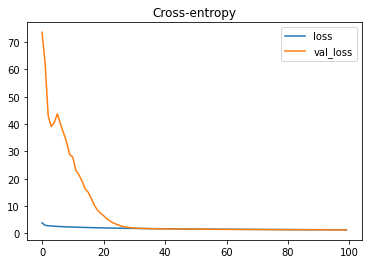

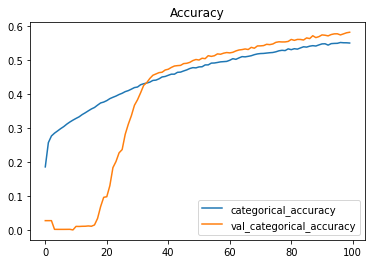

In [20]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=3000,
    epochs=100,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['categorical_accuracy', 'val_categorical_accuracy']].plot(title="Accuracy")

<AxesSubplot:title={'center':'Accuracy'}>

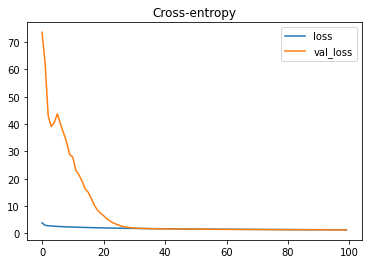

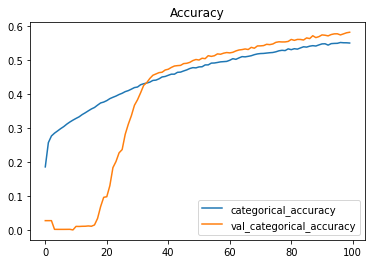

In [21]:
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['categorical_accuracy', 'val_categorical_accuracy']].plot(title="Accuracy")